Linear Regression using PyTorch on Synthetic Data.

In [ ]:
import torch.nn as nn
import torch
import torchvision
import numpy as np

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [74, 66, 43],
                   [91, 87, 65],
                   [88, 134, 59],
                   [101, 44, 37],
                   [68, 96, 71],
                   [73, 66, 44],
                   [92, 87, 64],
                   [87, 135, 57],
                   [103, 43, 36],
                   [68, 97, 70]],
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [57, 69],
                    [80, 102],
                    [118, 132],
                    [21, 38],
                    [104, 118],
                    [57, 69],
                    [82, 100],
                    [118, 134],
                    [20, 38],
                    [102, 120]],
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
# Define dataset
train_ds = TensorDataset(inputs, targets)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# Define data loader
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In each iteration, the data loader returns one batch of data with the given batch size. If `shuffle` is set to `True`, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

In [ ]:
# Define model
model = nn.Linear(3, 2)  #(no.of inputs, no.of targets)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4886, -0.5147,  0.3540],
        [ 0.2928,  0.4407, -0.3297]], requires_grad=True)
Parameter containing:
tensor([0.4752, 0.5098], requires_grad=True)


In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[-54.4548,  37.2341],
        [-66.6242,  44.8356],
        [-90.4706,  65.9136],
        [-58.3944,  37.1275],
        [-57.8693,  39.9411],
        [-54.4286,  37.0862],
        [-65.7555,  44.0652],
        [-90.6052,  65.8767],
        [-58.4205,  37.2753],
        [-57.0267,  39.3186],
        [-53.5861,  36.4637],
        [-66.5981,  44.6877],
        [-91.3393,  66.6839],
        [-59.2369,  37.7500],
        [-57.8954,  40.0889]], grad_fn=<AddmmBackward0>)

In [ ]:
# Import nn.functional
import torch.nn.functional as F
# Define loss function
loss_fn = F.mse_loss

In [ ]:
loss = loss_fn(model(inputs), targets)   #lossfn(preds,target)
print(loss)

tensor(12485.3037, grad_fn=<MseLossBackward0>)


In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-7)

In [ ]:
import matplotlib.pyplot as plt
# Utility function to train the model and plot loss curves
def fit(num_epochs, model, loss_fn, opt, train_dl):

    # Lists to store training loss values
    training_losses = []

    # Repeat for the given number of epochs
    for epoch in range(num_epochs):

        # Lists to store batch losses for this epoch
        batch_losses = []

        # Train with batches of data
        for xb, yb in train_dl:

            # 1. Generate predictions
            pred = model(xb)

            # 2. Calculate loss
            loss = loss_fn(pred, yb)

            # 3. Compute gradients
            loss.backward(create_graph=True)

            # 4. Update parameters using gradients
            opt.step()

            # 5. Reset the gradients to zero
            opt.zero_grad()

            # Append the batch loss to the list
            batch_losses.append(loss.item())

        # Calculate and store the average loss for this epoch
        epoch_loss = sum(batch_losses) / len(batch_losses)
        training_losses.append(epoch_loss)

        # Print the progress
        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss))

    # Plot the training loss curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss', marker='o')
    plt.title('Training Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


Epoch [10/1000], Loss: 435.6174
Epoch [20/1000], Loss: 415.1673
Epoch [30/1000], Loss: 400.5471
Epoch [40/1000], Loss: 389.4093
Epoch [50/1000], Loss: 380.3607
Epoch [60/1000], Loss: 372.5648
Epoch [70/1000], Loss: 365.5599
Epoch [80/1000], Loss: 359.0566
Epoch [90/1000], Loss: 352.8818
Epoch [100/1000], Loss: 346.9503
Epoch [110/1000], Loss: 341.2096
Epoch [120/1000], Loss: 335.6150
Epoch [130/1000], Loss: 330.1484
Epoch [140/1000], Loss: 324.8001
Epoch [150/1000], Loss: 319.5570
Epoch [160/1000], Loss: 314.4084
Epoch [170/1000], Loss: 309.3740
Epoch [180/1000], Loss: 304.4249
Epoch [190/1000], Loss: 299.5697
Epoch [200/1000], Loss: 294.8032
Epoch [210/1000], Loss: 290.1258
Epoch [220/1000], Loss: 285.5370
Epoch [230/1000], Loss: 281.0295
Epoch [240/1000], Loss: 276.6067
Epoch [250/1000], Loss: 272.2626
Epoch [260/1000], Loss: 268.0022
Epoch [270/1000], Loss: 263.8200
Epoch [280/1000], Loss: 259.7132
Epoch [290/1000], Loss: 255.6825
Epoch [300/1000], Loss: 251.7224
Epoch [310/1000], L

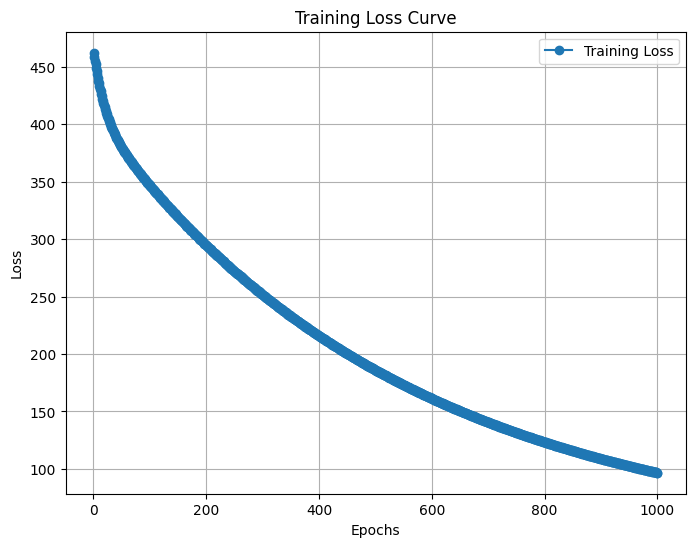

In [ ]:
fit(1000, model, loss_fn, opt, train_dl)

In [ ]:
# Import nn.functional
import torch.nn.functional as F
# Define loss function
loss_fn = F.cross_entropy
loss = loss_fn(model(inputs), targets)
opt = torch.optim.SGD(model.parameters(), lr=1e-7)
import matplotlib.pyplot as plt
# Utility function to train the model and plot loss curves
def fit(num_epochs, model, loss_fn, opt, train_dl):

    # Lists to store training loss values
    training_losses = []

    # Repeat for the given number of epochs
    for epoch in range(num_epochs):

        # Lists to store batch losses for this epoch
        batch_losses = []

        # Train with batches of data
        for xb, yb in train_dl:

            # 1. Generate predictions
            pred = model(xb)

            # 2. Calculate loss
            loss = loss_fn(pred, yb)

            # 3. Compute gradients
            loss.backward(create_graph=True)

            # 4. Update parameters using gradients
            opt.step()

            # 5. Reset the gradients to zero
            opt.zero_grad()

            # Append the batch loss to the list
            batch_losses.append(loss.item())

        # Calculate and store the average loss for this epoch
        epoch_loss = sum(batch_losses) / len(batch_losses)
        training_losses.append(epoch_loss)

        # Print the progress
        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss))

    # Plot the training loss curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss', marker='o')
    plt.title('Training Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


Epoch [10/1000], Loss: 785.4116
Epoch [20/1000], Loss: 770.7933
Epoch [30/1000], Loss: 750.3154
Epoch [40/1000], Loss: 729.3937
Epoch [50/1000], Loss: 708.9375
Epoch [60/1000], Loss: 688.2238
Epoch [70/1000], Loss: 667.0581
Epoch [80/1000], Loss: 646.9598
Epoch [90/1000], Loss: 624.9179
Epoch [100/1000], Loss: 604.4853
Epoch [110/1000], Loss: 585.0058
Epoch [120/1000], Loss: 564.5059
Epoch [130/1000], Loss: 543.6508
Epoch [140/1000], Loss: 523.4563
Epoch [150/1000], Loss: 503.5847
Epoch [160/1000], Loss: 483.1608
Epoch [170/1000], Loss: 462.8809
Epoch [180/1000], Loss: 441.5096
Epoch [190/1000], Loss: 422.7627
Epoch [200/1000], Loss: 403.3533
Epoch [210/1000], Loss: 383.4686
Epoch [220/1000], Loss: 363.9878
Epoch [230/1000], Loss: 343.8924
Epoch [240/1000], Loss: 326.7720
Epoch [250/1000], Loss: 309.3268
Epoch [260/1000], Loss: 292.0604
Epoch [270/1000], Loss: 273.7293
Epoch [280/1000], Loss: 260.1018
Epoch [290/1000], Loss: 245.8565
Epoch [300/1000], Loss: 226.3823
Epoch [310/1000], L

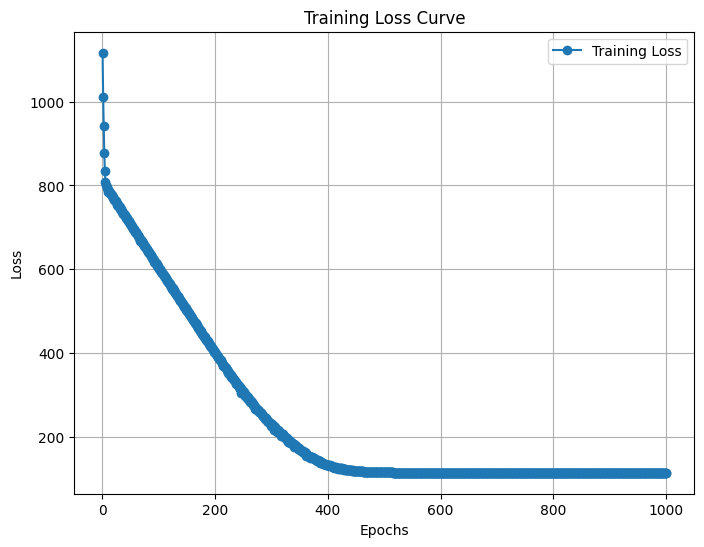

In [ ]:
fit(1000, model, loss_fn, opt, train_dl)

In [ ]:
# Import nn.functional
import torch.nn.functional as F
# Define loss function
loss_fn = F.hinge_embedding_loss
loss = loss_fn(model(inputs), targets)
opt = torch.optim.SGD(model.parameters(), lr=1e-7)
import matplotlib.pyplot as plt
# Utility function to train the model and plot loss curves
def fit(num_epochs, model, loss_fn, opt, train_dl):

    # Lists to store training loss values
    training_losses = []

    # Repeat for the given number of epochs
    for epoch in range(num_epochs):

        # Lists to store batch losses for this epoch
        batch_losses = []

        # Train with batches of data
        for xb, yb in train_dl:

            # 1. Generate predictions
            pred = model(xb)

            # 2. Calculate loss
            loss = loss_fn(pred, yb)

            # 3. Compute gradients
            loss.backward(create_graph=True)

            # 4. Update parameters using gradients
            opt.step()

            # 5. Reset the gradients to zero
            opt.zero_grad()

            # Append the batch loss to the list
            batch_losses.append(loss.item())

        # Calculate and store the average loss for this epoch
        epoch_loss = sum(batch_losses) / len(batch_losses)
        training_losses.append(epoch_loss)

        # Print the progress
        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss))

    # Plot the training loss curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss', marker='o')
    plt.title('Training Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


Epoch [10/1000], Loss: 84.6983
Epoch [20/1000], Loss: 84.5677
Epoch [30/1000], Loss: 84.4371
Epoch [40/1000], Loss: 84.3065
Epoch [50/1000], Loss: 84.1759
Epoch [60/1000], Loss: 84.0453
Epoch [70/1000], Loss: 83.9147
Epoch [80/1000], Loss: 83.7841
Epoch [90/1000], Loss: 83.6535
Epoch [100/1000], Loss: 83.5229
Epoch [110/1000], Loss: 83.3923
Epoch [120/1000], Loss: 83.2617
Epoch [130/1000], Loss: 83.1311
Epoch [140/1000], Loss: 83.0005
Epoch [150/1000], Loss: 82.8699
Epoch [160/1000], Loss: 82.7394
Epoch [170/1000], Loss: 82.6088
Epoch [180/1000], Loss: 82.4782
Epoch [190/1000], Loss: 82.3476
Epoch [200/1000], Loss: 82.2170
Epoch [210/1000], Loss: 82.0864
Epoch [220/1000], Loss: 81.9558
Epoch [230/1000], Loss: 81.8252
Epoch [240/1000], Loss: 81.6946
Epoch [250/1000], Loss: 81.5640
Epoch [260/1000], Loss: 81.4334
Epoch [270/1000], Loss: 81.3028
Epoch [280/1000], Loss: 81.1722
Epoch [290/1000], Loss: 81.0416
Epoch [300/1000], Loss: 80.9110
Epoch [310/1000], Loss: 80.7804
Epoch [320/1000],

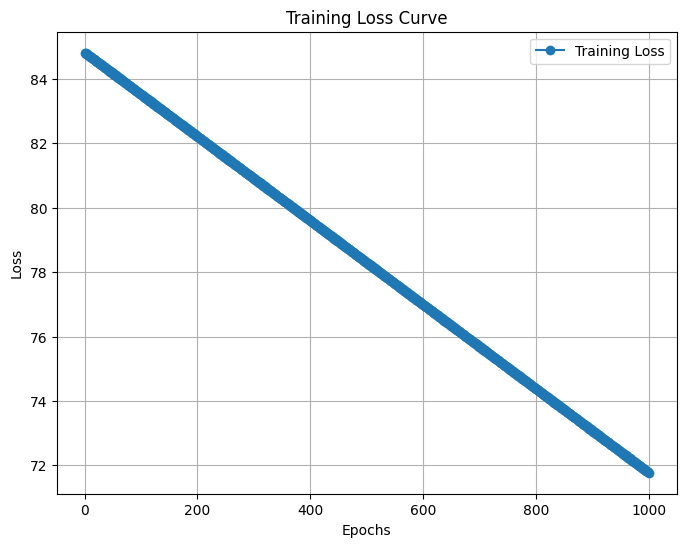

In [ ]:
fit(1000, model, loss_fn, opt, train_dl)